# Assignment 4 - Henry Woodyard

# Question 0

Show all your code to acquire the dataset in your notebook. If you fail to show how you acquired
the dataset, you will earn a zero on the assignment.

In [3]:
import requests as req
import pandas as pd
import matplotlib.pyplot as plt

from io import StringIO

In [4]:
# Querying each year separately to avoid a '400' response code
quakes16req = req.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2017-01-01&minmagnitude=4")
quakes17req = req.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2018-01-01&minmagnitude=4")
quakes18req = req.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2019-01-01&minmagnitude=4")
quakes19req = req.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-02&minmagnitude=4")

In [5]:
quakes16 = pd.read_csv(StringIO(quakes16req.text))
quakes17 = pd.read_csv(StringIO(quakes17req.text))
quakes18 = pd.read_csv(StringIO(quakes18req.text))
quakes19 = pd.read_csv(StringIO(quakes19req.text))

allquakes = [quakes16, quakes17, quakes18, quakes19]
quakes = pd.concat(allquakes, ignore_index = True)
quakes = quakes[quakes['type'] == 'earthquake']

# Question 1
Use describe to get the basic statistics of all the columns (5 points)


In [6]:
quakes.describe()

latitude     longitude         depth           mag         nst  \
count  52952.000000  52952.000000  52952.000000  52952.000000  337.000000   
mean       1.883882     34.095975     94.244194      4.526335   47.314540   
std       28.964458    124.269165    147.874754      0.397906   35.342401   
min      -79.983700   -179.998600     -0.930000      4.000000    4.000000   
25%      -19.519075    -74.364000     10.000000      4.300000   23.000000   
50%       -3.359400     94.024600     33.930000      4.500000   37.000000   
75%       24.317925    141.909925    106.190000      4.700000   64.000000   
max       86.996400    179.999300    690.950000      8.200000  289.000000   

                gap          dmin           rms  horizontalError  \
count  52107.000000  52062.000000  52952.000000     52510.000000   
mean     110.728999      3.713393      0.827343         8.754759   
std       51.023066      4.737850      0.262191         3.650921   
min        7.000000      0.000000      0.000000         0.000000   
25%       73.000000      1.173000      0.650000         6.300000   
50%      106.000000      2.382000      0.810000         8.200000   
75%      142.000000      4.399000      0.990000        10.800000   
max      346.000000     62.626000      2.530000        51.700000   

         depthError      magError        magNst  
count  52952.000000  51237.000000  51378.000000  
mean       5.449802      0.121074     42.227763  
std        4.190637      0.065078     61.171167  
min        0.000000      0.000000      0.000000  
25%        1.900000      0.073000     12.000000  
50%        4.800000      0.112000     21.000000  
75%        7.900000      0.153000     45.000000  
max       69.300000      1.000000    854.000000

# Question 2
Get the top 10 earthquakes by magnitude (5 points)



In [7]:
quakes.sort_values(by = 'mag', ascending = False).head(10)

time  latitude  longitude   depth  mag magType  \
19922  2017-09-08T04:49:19.180Z   15.0222   -93.8993   47.39  8.2     mww   
34757  2018-08-19T00:19:40.670Z  -18.1125  -178.1530  600.00  8.2     mww   
47646  2019-05-26T07:41:15.073Z   -5.8119   -75.2697  122.57  8.0     mww   
33669  2018-09-06T15:49:18.710Z  -18.4743   179.3502  670.81  7.9     mww   
27708  2017-01-22T04:30:22.960Z   -6.2464   155.1718  135.00  7.9     mww   
42324  2018-01-23T09:31:40.890Z   56.0039  -149.1658   14.06  7.9     mww   
789    2016-12-17T10:51:10.500Z   -4.5049   153.5216   94.54  7.9     mww   
2674   2016-11-13T11:02:56.340Z  -42.7373   173.0540   15.11  7.8     mww   
1335   2016-12-08T17:38:46.280Z  -10.6812   161.3273   40.00  7.8     mww   
11284  2016-04-16T23:58:36.980Z    0.3819   -79.9218   20.59  7.8     mww   

       nst   gap   dmin   rms  ...                   updated  \
19922  NaN  22.0  0.944  1.22  ...  2019-09-12T03:25:23.535Z   
34757  NaN  13.0  3.630  0.79  ...  2019-08-19T06:18:42.402Z   
47646  NaN  17.0  3.180  0.84  ...  2019-10-20T00:29:23.662Z   
33669  NaN  12.0  1.431  1.07  ...  2019-04-23T04:45:27.592Z   
27708  NaN   9.0  3.625  1.22  ...  2018-10-17T21:53:19.164Z   
42324  NaN  30.0  2.585  0.77  ...  2019-07-01T15:34:15.502Z   
789    NaN  13.0  1.389  0.97  ...  2018-10-17T21:50:55.380Z   
2674   NaN  21.0  0.481  0.56  ...  2019-04-15T21:55:36.454Z   
1335   NaN  13.0  1.836  0.88  ...  2018-10-17T21:50:46.404Z   
11284  NaN  15.0  1.440  0.94  ...  2019-10-15T14:06:57.770Z   

                                       place        type horizontalError  \
19922        101km SSW of Tres Picos, Mexico  earthquake             6.2   
34757         286km NNE of Ndoi Island, Fiji  earthquake             9.6   
47646               78km SE of Lagunas, Peru  earthquake             7.0   
33669                102km ESE of Suva, Fiji  earthquake             9.5   
27708  35km WNW of Panguna, Papua New Guinea  earthquake             7.3   
42324             280km SE of Kodiak, Alaska  earthquake             6.0   
789        54km E of Taron, Papua New Guinea  earthquake             7.3   
2674       54km NNE of Amberley, New Zealand  earthquake             4.6   
1335   69km WSW of Kirakira, Solomon Islands  earthquake             8.3   
11284            27km SSE of Muisne, Ecuador  earthquake             5.7   

      depthError  magError  magNst    status  locationSource magSource  
19922        3.7     0.058    29.0  reviewed              us        us  
34757        1.9     0.045    47.0  reviewed              us        us  
47646        4.0     0.036    75.0  reviewed              us        us  
33669        2.8     0.025   157.0  reviewed              us        us  
27708        1.8     0.042    54.0  reviewed              us        us  
42324        2.8     0.034    81.0  reviewed              us        us  
789          3.8       NaN     NaN  reviewed              us        us  
2674         3.2       NaN     NaN  reviewed              us        us  
1335         1.8       NaN     NaN  reviewed              us        us  
11284        3.2       NaN     NaN  reviewed              us        us  

[10 rows x 22 columns]

# Question 3
Handle all Null/empty data by filling it with zeros (10 points)



In [8]:
quakes = quakes.fillna(0)

# Question 4
Find the top 10 places where the strongest earthquakes occurred (15 points)



In [9]:
def cleanLocation(locationString):
    ofLoc = locationString.find('of')
    if(ofLoc <= 0):
        return locationString
    return locationString[(ofLoc + 3):]

In [10]:
quakes['place'] = quakes['place'].apply(cleanLocation)
quakes.sort_values(by = 'mag', ascending = False)[['place', 'mag']].head(10)

place  mag
19922         Tres Picos, Mexico  8.2
34757          Ndoi Island, Fiji  8.2
47646              Lagunas, Peru  8.0
33669                 Suva, Fiji  7.9
27708  Panguna, Papua New Guinea  7.9
42324             Kodiak, Alaska  7.9
789      Taron, Papua New Guinea  7.9
2674       Amberley, New Zealand  7.8
1335   Kirakira, Solomon Islands  7.8
11284            Muisne, Ecuador  7.8

# Question 5
Find the top 10 places where the weakest earthquakes occurred (15 points)



In [11]:
quakes.sort_values(by = 'mag', ascending = True)[['place', 'mag']].head(10)

place  mag
46221                           Ovalle, Chile  4.0
13311              Padangsidempuan, Indonesia  4.0
13323                        Yelizovo, Russia  4.0
25606                         Kali, Indonesia  4.0
13339                          Circle, Alaska  4.0
25592                        Elbistan, Turkey  4.0
13341                           Rudna, Poland  4.0
13344                           Lambasa, Fiji  4.0
2393                    Blenheim, New Zealand  4.0
13361  Laikit, Laikit II (Dimembe), Indonesia  4.0

# Question 6
On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following
magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5:
(7,MAX]. Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.


**Note: I created the histogram here using the transparencies as you suggested, but having relatively few bins makes it look wonky. I suggest using subplots for better visualization.**

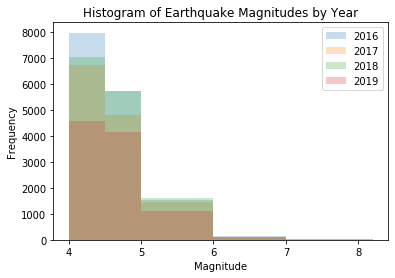

In [12]:
quakes['year'] = quakes['time'].apply(lambda time: time[0:4])
plotquakes = quakes[quakes['mag'] != 7]

quakebins = [4, 4.5, 5, 6, 7, plotquakes['mag'].max()]


plt.hist(plotquakes[plotquakes['year'] == '2016']['mag'], bins = quakebins, alpha = .25)
plt.hist(plotquakes[plotquakes['year'] == '2017']['mag'], bins = quakebins, alpha = .25)
plt.hist(plotquakes[plotquakes['year'] == '2018']['mag'], bins = quakebins, alpha = .25)
plt.hist(plotquakes[plotquakes['year'] == '2019']['mag'], bins = quakebins, alpha = .25)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Histogram of Earthquake Magnitudes by Year")
plt.legend(['2016', '2017', '2018', '2019'])

# Question 7
Find the 10 countries with the highest number of earthquakes (30 points) (Note: Yes, this is only countries, not full place)


In [13]:
def getCountry(location):
    comLoc = location.find(',')
    if(comLoc <= 0):
        return location
    return location[(comLoc + 2):]

In [14]:
quakes['country'] = quakes['place'].apply(getCountry)
countryCounts = quakes.groupby('country').count()
countryCounts = countryCounts.sort_values(by = 'time', ascending = False).iloc[:,1]
countryCounts.head(10)

country
Indonesia           6574
Japan               3427
Papua New Guinea    3091
Fiji                2530
New Zealand         2393
Chile               2291
Philippines         2087
Alaska              1865
Russia              1757
Tonga               1644
Name: latitude, dtype: int64

# Question 8
Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake
count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?
(20 points) Please add labels and colors to the plot.


Text(0.5, 1.0, 'Histogram of Earthquake Magnitudes')

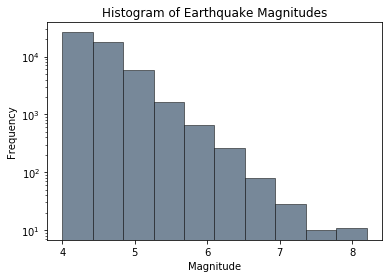

In [15]:
plt.hist(quakes['mag'], log = True, color = 'lightslategrey', lw = .5, ec = 'k')
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Histogram of Earthquake Magnitudes")

# Question 9
Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake
count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20
points) Please add labels and colors to the plot.



Text(0.5, 1.0, 'Histogram of Earthquake Depths')

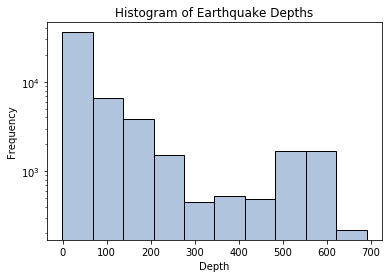

In [16]:
plt.hist(quakes['depth'], log = True, color = 'lightsteelblue', lw = 1, ec = 'k')
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.title("Histogram of Earthquake Depths")

# Question 10
Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20
points) Please add labels and colors to the plot.



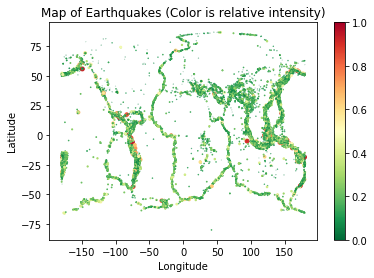

In [17]:
sizes = (quakes['mag'] - quakes['mag'].min()) ** 2
colors = (quakes['mag'] - quakes['mag'].min()) / (quakes['mag'].max() - quakes['mag'].min())

plt.scatter(quakes['longitude'], quakes['latitude'], c = colors, s = sizes, cmap = 'RdYlGn_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Earthquakes (Color is relative intensity)')
plt.colorbar()

# Question 11
Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only
have data from the USA . You need to create a function that accommodates this. (20 points)

**Note: Ignore the warning you might receive from running the following. The output is as expected.**

In [18]:
import us

quakes['areaName'] = quakes['country'].apply(lambda loc: str(us.states.lookup(loc)))
quakesUS = quakes[quakes['areaName'] != 'None']

states = list(map(str, us.states.STATES))
quakesUS['isState'] = quakes['areaName'].apply(lambda area: area in states)

/home/Henrytw/BigData/BigData_venv/lib64/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Question 12
Using the cleaned US-only version of your dataset answer the following questions (30 points
total):

**a)** Find the top 10 US states where the strongest earthquakes occurred (10 points)

In [19]:
quakesUS[quakesUS['isState']].groupby('areaName').max()['mag'].sort_values(ascending = False).head(10)

areaName
Alaska        7.9
Hawaii        6.9
California    6.6
Oregon        6.3
Oklahoma      5.8
Montana       5.8
Nevada        5.6
Idaho         5.3
Georgia       5.0
Wyoming       4.8
Name: mag, dtype: float64

**b)** On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following
magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5:
(7,MAX]. Pay close attention to the group ranges. (10 points) Please add labels and colors to the plot.

**Note: Same issue as in Q6. I suggest subplots rather than transparencies.**

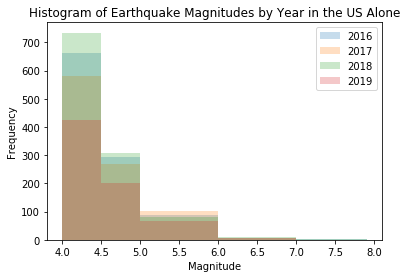

In [20]:
plotquakesUS = quakesUS[quakesUS['mag'] != 7]
quakebinsUS = [4, 4.5, 5, 6, 7, plotquakesUS['mag'].max()]

plt.hist(plotquakesUS[plotquakesUS['year'] == '2016']['mag'], bins = quakebinsUS, alpha = .25)
plt.hist(plotquakesUS[plotquakesUS['year'] == '2017']['mag'], bins = quakebinsUS, alpha = .25)
plt.hist(plotquakesUS[plotquakesUS['year'] == '2018']['mag'], bins = quakebinsUS, alpha = .25)
plt.hist(plotquakesUS[plotquakesUS['year'] == '2019']['mag'], bins = quakebinsUS, alpha = .25)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Histogram of Earthquake Magnitudes by Year in the US Alone")
plt.legend(['2016', '2017', '2018', '2019'])

**c)** Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay
a US map on top of this plot to match the locations. (20 points) Please add labels and colors to the plot.




Text(0.5, 1.0, 'Map of Earthquakes (Color is relative intensity)')

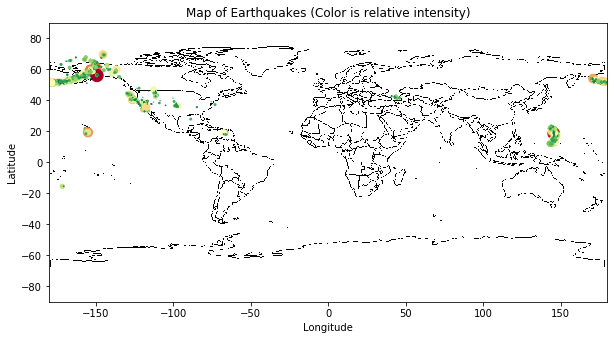

In [21]:
worldmap = plt.imread("world_map.png")

plt.subplots(figsize = (10, 8))

sizes = ((quakesUS['mag'] - quakesUS['mag'].min()) ** 2) * 10
colors = (quakesUS['mag'] - quakesUS['mag'].min()) / (quakesUS['mag'].max() - quakesUS['mag'].min())

plt.scatter(quakesUS['longitude'], quakesUS['latitude'], c = colors, s = sizes, cmap = 'RdYlGn_r')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.imshow(worldmap, extent = [-229, 211, -162, 162])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Earthquakes (Color is relative intensity)')
